In [4]:
%pylab inline
%matplotlib inline
from scipy import *
import scipy.linalg
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from numpy import linalg as LA
from random import sample
import pandas as pd
import seaborn as sns
from math import *
import scipy.linalg as sp
np.random.seed(3)

Populating the interactive namespace from numpy and matplotlib


In [16]:
nikkei = pd.read_csv("Nikkei-2010-2012.csv",index_col="Ticker")
def Part_one():
    returns_df = pd.DataFrame()
    sin_ultimo = nikkei.columns[:-1]
    sin_primero = nikkei.columns[1:]
    tupla = zip(sin_ultimo,sin_primero)
    for F0, F1 in tupla:
        Fecha_inicio = str(F0) 
        Fecha_Final = str(F1)
        Pt = np.array(nikkei[F0])
        Pt_1 = np.array(nikkei[F1])
        returns_df["{} a {}".format(Fecha_inicio,Fecha_Final)] = (Pt_1 - Pt)/ Pt
    returns_df.set_index(nikkei.index, inplace=True)    
    return returns_df

R_vals = Part_one()

def Division_of_Epochs(epochs, Data_Frame):
    # Returns arrays of the columns of the specified Data Frame 
    # with a length equal to epochs 
    columns = np.array(Data_Frame.columns)
    division = np.arange(len(columns), step=epochs)[1:]
    cols = np.array_split(columns,division)
    return cols
divided = Division_of_Epochs(40, R_vals)
fifth_epoch = R_vals[divided[:][4]]   #The 5th epoch
fifth_epoch

C:\Users\DKmat\AppData\Local\Temp/ipykernel_7544/3117852013.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  returns_df["{} a {}".format(Fecha_inicio,Fecha_Final)] = (Pt_1 - Pt)/ Pt


,2010-08-27 a 2010-08-30,2010-08-30 a 2010-08-31,2010-08-31 a 2010-09-01,2010-09-01 a 2010-09-02,2010-09-02 a 2010-09-03,2010-09-03 a 2010-09-06,2010-09-06 a 2010-09-07,2010-09-07 a 2010-09-08,2010-09-08 a 2010-09-09,2010-09-09 a 2010-09-10,...,2010-10-14 a 2010-10-15,2010-10-15 a 2010-10-18,2010-10-18 a 2010-10-19,2010-10-19 a 2010-10-20,2010-10-20 a 2010-10-21,2010-10-21 a 2010-10-22,2010-10-22 a 2010-10-25,2010-10-25 a 2010-10-26,2010-10-26 a 2010-10-27,2010-10-27 a 2010-10-28
Ticker,,,,,,,,,,,,,,,,,,,,,
4151.t,0.025701,-0.063781,-0.021898,0.042289,0.000000,0.015513,-0.014101,-0.013111,0.007246,-0.008393,...,-0.002353,0.000000,0.014151,-0.024419,0.000000,-0.015495,-0.013317,0.008589,-0.013382,-0.017263
4502.t,0.012987,-0.010256,-0.001295,0.009079,0.010283,0.011450,-0.001258,-0.003778,0.006321,0.003769,...,-0.005141,0.003876,0.002574,-0.014121,-0.006510,0.007864,-0.007802,0.000000,-0.010485,0.001325
4503.t,0.012044,-0.012921,0.019635,0.028716,-0.006568,0.009917,-0.008183,-0.008251,0.000000,0.003328,...,0.006390,0.006349,0.004732,-0.028257,0.001616,-0.009677,-0.003257,-0.011438,-0.004959,-0.001661
4506.t,0.011364,-0.021067,0.017217,-0.007052,0.005682,0.008475,-0.012605,-0.017021,-0.007215,0.000000,...,-0.008403,-0.002825,0.024079,-0.033195,0.014306,-0.012694,-0.027143,0.014684,-0.001447,-0.018841
4507.t,0.007353,-0.027206,-0.001364,0.005464,0.007473,0.016183,-0.008626,-0.010710,-0.004060,0.037364,...,-0.020408,0.010081,0.012641,-0.017083,-0.011364,0.019608,-0.027188,-0.014997,-0.011765,-0.019608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9501.t,0.002449,-0.004072,0.011447,0.002829,-0.004031,0.009308,-0.001203,-0.012043,-0.006095,-0.001635,...,0.007932,0.012592,0.005699,-0.003091,-0.004134,-0.007265,-0.008364,-0.000527,-0.014768,0.005889
9502.t,0.007243,-0.005393,0.012653,0.004016,-0.003111,0.012037,-0.001322,-0.003970,0.007086,-0.009235,...,-0.012920,0.035079,0.006070,-0.011564,0.001017,-0.002541,-0.014773,0.012410,-0.002554,0.002048
9503.t,0.001849,-0.005999,0.010214,0.004596,-0.002745,0.009174,0.000000,-0.001364,0.001821,-0.004998,...,-0.009269,0.030665,0.007564,-0.012513,-0.002534,-0.005589,-0.010220,0.010325,-0.003577,0.003077


In [30]:
some_sample = fifth_epoch.iloc[random.sample(range(1, 212), 38), :] #Some 38 time series for the fifth epoch
some_sample

,2010-08-27 a 2010-08-30,2010-08-30 a 2010-08-31,2010-08-31 a 2010-09-01,2010-09-01 a 2010-09-02,2010-09-02 a 2010-09-03,2010-09-03 a 2010-09-06,2010-09-06 a 2010-09-07,2010-09-07 a 2010-09-08,2010-09-08 a 2010-09-09,2010-09-09 a 2010-09-10,...,2010-10-14 a 2010-10-15,2010-10-15 a 2010-10-18,2010-10-18 a 2010-10-19,2010-10-19 a 2010-10-20,2010-10-20 a 2010-10-21,2010-10-21 a 2010-10-22,2010-10-22 a 2010-10-25,2010-10-25 a 2010-10-26,2010-10-26 a 2010-10-27,2010-10-27 a 2010-10-28
Ticker,,,,,,,,,,,,,,,,,,,,,
4503.t,0.012044,-0.012921,0.019635,0.028716,-0.006568,0.009917,-0.008183,-0.008251,0.000000,0.003328,...,0.006390,0.006349,0.004732,-0.028257,0.001616,-0.009677,-0.003257,-0.011438,-0.004959,-0.001661
8725.t,0.019689,-0.043699,0.021785,0.020281,0.000510,0.039735,0.000980,-0.014195,0.010924,0.010314,...,-0.028869,0.012671,-0.003850,-0.013527,-0.006366,0.002464,-0.004916,-0.000494,-0.007909,-0.023418
6770.t,0.020033,-0.052373,0.006908,-0.001715,0.048110,0.032787,-0.017460,-0.040388,0.013468,0.021595,...,-0.020134,0.010959,0.033875,-0.027523,0.009434,0.029372,-0.010376,-0.003932,0.003947,-0.023591
6752.t,0.018605,-0.024658,0.009363,0.001855,0.000926,0.019426,-0.001815,-0.020000,0.004638,0.007387,...,-0.012417,0.004191,-0.002504,-0.011715,0.006774,0.018503,-0.004129,-0.003317,0.000000,-0.004160
6326.t,0.017341,-0.042614,0.019288,0.034934,0.007032,0.036313,0.000000,-0.021563,0.012397,0.009524,...,-0.009211,-0.009296,0.005362,-0.025333,0.001368,0.002732,-0.009537,-0.013755,0.002789,-0.004172
9984.t,0.016327,-0.031727,0.012028,-0.008607,0.000827,0.007848,-0.010656,-0.011185,0.016757,0.020602,...,-0.001091,-0.014192,-0.017350,-0.012021,0.009125,0.003768,-0.012012,0.000000,0.014438,-0.009363
4523.t,0.013072,-0.022581,0.014851,0.003252,0.006483,0.004831,-0.001603,-0.006421,0.003231,0.009662,...,-0.000703,0.002813,-0.004909,-0.011628,0.001070,-0.007835,0.003948,-0.003575,-0.007894,0.007595
7269.t,0.005332,-0.018268,0.015006,0.014784,0.020979,0.015411,-0.014053,-0.015393,-0.002316,0.011608,...,-0.017973,0.007626,0.004541,-0.019588,-0.009221,0.008273,-0.001538,-0.003082,0.007213,0.010230
6902.t,0.005133,-0.032766,-0.000880,0.030383,-0.008974,0.032342,-0.008772,-0.027813,0.000867,0.006929,...,-0.017871,0.016175,0.007959,-0.013028,0.006000,0.010338,-0.004723,-0.016607,0.027744,-0.002739


In [56]:
a = 0.95
t = 40
mem = 500 #500 member ensamble
mm = int(a*t)

xval = np.zeros(mem*mm)

j=0
for i in range(mem):
    #This is the 38 x 40 matrix choosen randomly from the 211 x 40 matrix of the fifth epoch
    mmat = np.array(fifth_epoch.iloc[random.sample(range(0, 211), 38), :])
    
    #Now we construct the correlation matrix from it
    CM = ( mmat.dot(np.matrix.transpose(mmat)) ) / t
    
    #Now the eigenvalues
    eigvalComp = np.linalg.eigvals(CM)
    eigval = np.real(eigvalComp)
    
    #We add the 38 eigenvalues of the correlation matrix to xval with dimension 500 times 38
    for k in range(mm):
        xval[j] = (eigval[k])
        j = j + 1

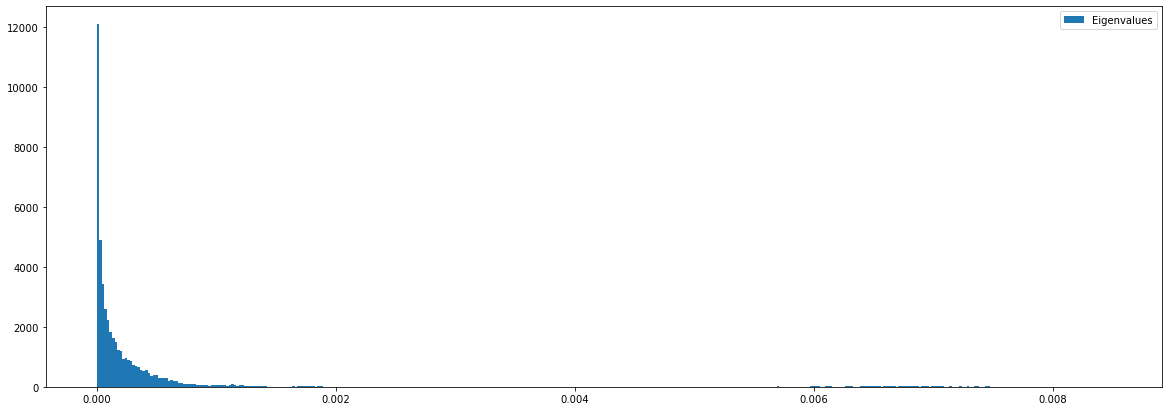

In [59]:
plt.hist(xval, 400, density=True, label = 'Eigenvalues')
plt.legend()
plt.rcParams['figure.figsize'] = [20, 9] #Adjust size if neccesary, perhaps your computer screen is wider or smaller

As we can see, this eigenvalue distribution agrees with the theory for a nonsingular ensemble of correlation matrices NSRSE. 